In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('heart.csv')


In [7]:
df.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()   

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df.duplicated().sum()


np.int64(0)

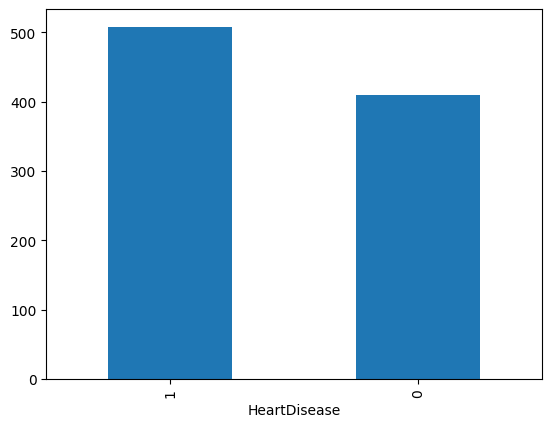

In [13]:
df['HeartDisease']  .value_counts() .plot(kind='bar')
plt.show()

In [14]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

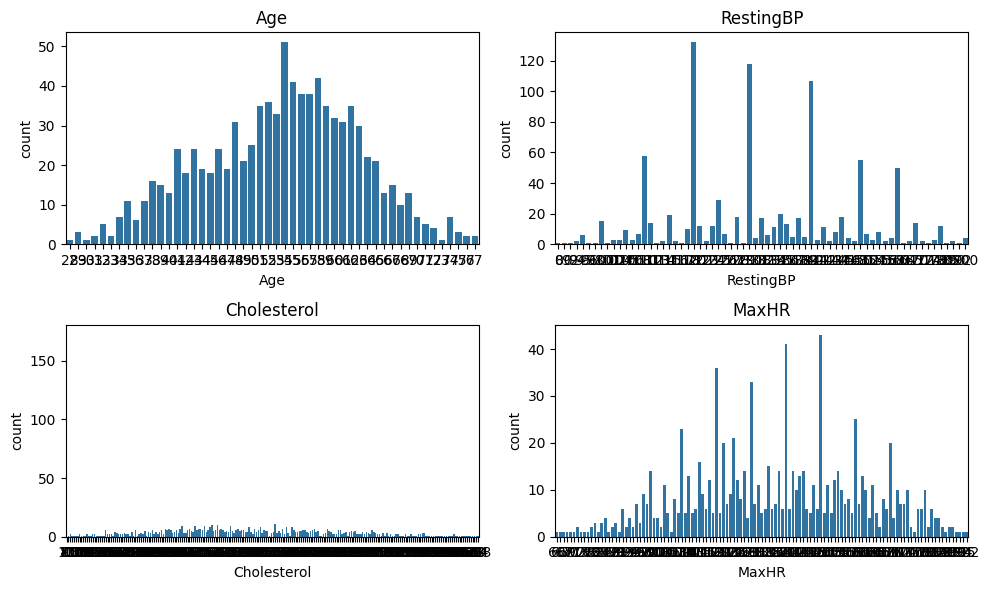

In [17]:
def plotting(var, num):
    plt.subplot(2, 2, num)
    sns.countplot(x=df[var])
    plt.title(var)

plt.figure(figsize=(10,6))
plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)
plt.tight_layout()
plt.show()


In [18]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [19]:
ch_mean= df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [20]:
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean)

In [21]:
df["Cholesterol"]=df["Cholesterol"].round(2)

In [22]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [23]:
df['Cholesterol'].value_counts()


Cholesterol
244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

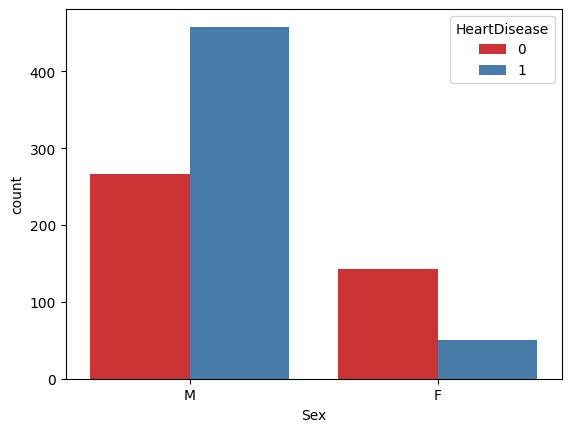

In [28]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'],palette='Set1')

<Axes: xlabel='ChestPainType', ylabel='count'>

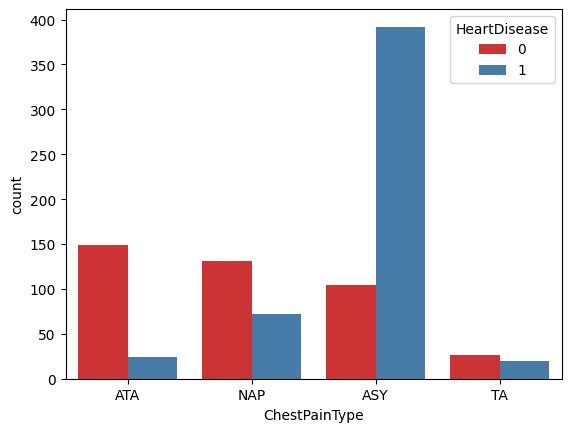

In [27]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'],palette='Set1')

<Axes: xlabel='FastingBS', ylabel='count'>

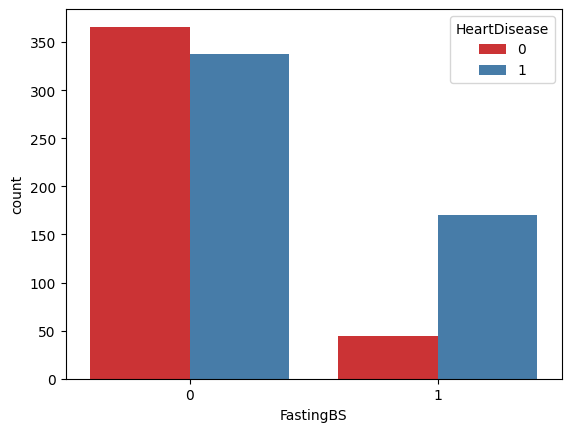

In [29]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'],palette='Set1'   )

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

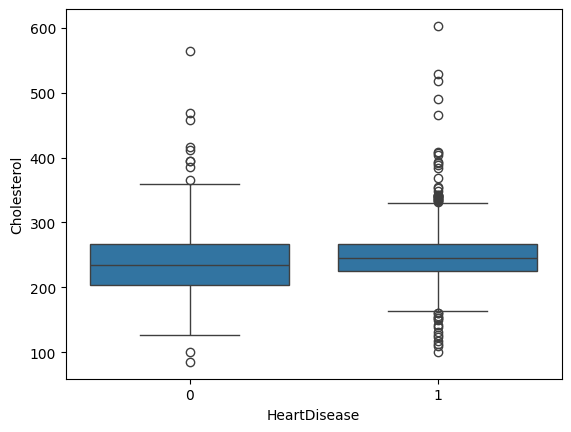

In [32]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df )

<Axes: xlabel='HeartDisease', ylabel='Age'>

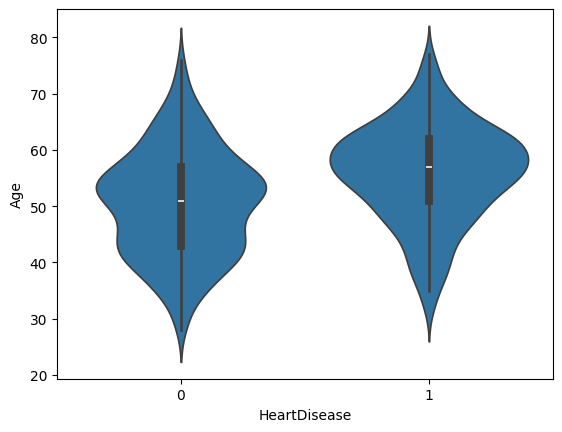

In [34]:
sns.violinplot(x='HeartDisease', y='Age', data=df )


# Data Processing and Cleaning

In [37]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [38]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [39]:
df_encoded = df_encoded.astype(int)

In [40]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [41]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


<Axes: xlabel='Age', ylabel='Count'>

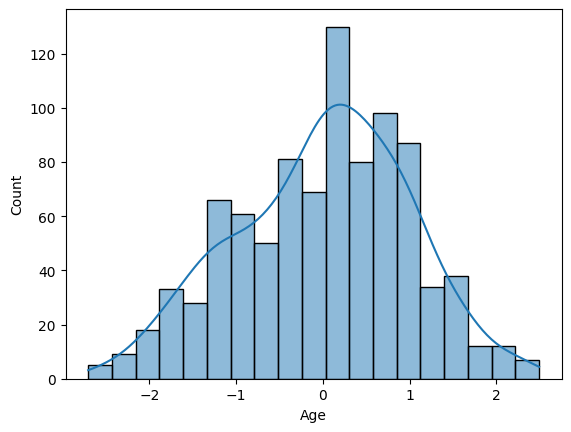

In [42]:
sns.histplot(df_encoded['Age'], kde=True)

In [43]:

df_encoded['age_category'] = pd.cut(df_encoded['Age'], 
                                    bins=[0, 18, 40, 60, float('inf')], 
                                    labels=['child', 'young_adult', 'middle_aged', 'senior'])
df_encoded['restingbp_category'] = pd.cut(df_encoded['RestingBP'], 
                                          bins=[0, 80, 120, 140, float('inf')], 
                                          labels=['low', 'normal', 'prehypertension', 'hypertension'])
df_encoded['cholesterol_category'] = pd.cut(df_encoded['Cholesterol'], 
                                            bins=[0, 200, 240, float('inf')], 
                                            labels=['normal', 'borderline_high', 'high'])
df_encoded['fastingbs_category'] = df_encoded['FastingBS'].map({0: 'normal', 1: 'high'})

In [44]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,age_category,restingbp_category,cholesterol_category,fastingbs_category
0,-1.433140,0.410909,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1,NaN,low,normal,normal
1,-0.478484,1.491752,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0,NaN,low,NaN,normal
2,-1.751359,-0.129513,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1,NaN,NaN,normal,normal
3,-0.584556,0.302825,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0,NaN,low,NaN,normal
4,0.051881,0.951331,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1,child,low,NaN,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.365619,0,-0.188999,0.282891,1,1,0,0,1,1,0,0,1,0,NaN,NaN,normal,normal
914,1.536902,0.627078,-0.966725,1,0.164684,2.303858,1,1,0,0,0,1,0,0,1,0,child,low,NaN,high
915,0.370100,-0.129513,-2.130180,0,-0.857069,0.282891,1,1,0,0,0,1,0,1,1,0,child,NaN,NaN,normal
916,0.370100,-0.129513,-0.159813,0,1.461525,-0.727592,1,0,1,0,0,0,0,0,1,0,child,NaN,NaN,normal


In [49]:

if all(col in df_encoded.columns for col in ['age_category', 'restingbp_category', 'cholesterol_category', 'fastingbs_category']):
    df_encoded = pd.get_dummies(df_encoded, columns=['age_category', 'restingbp_category', 'cholesterol_category', 'fastingbs_category'], drop_first=True)
else:

    df_encoded['age_category'] = pd.cut(df_encoded['Age'], 
                                        bins=[0, 18, 40, 60, float('inf')], 
                                        labels=['child', 'young_adult', 'middle_aged', 'senior'])
    df_encoded['restingbp_category'] = pd.cut(df_encoded['RestingBP'], 
                                              bins=[0, 80, 120, 140, float('inf')], 
                                              labels=['low', 'normal', 'prehypertension', 'hypertension'])
    df_encoded['cholesterol_category'] = pd.cut(df_encoded['Cholesterol'], 
                                                bins=[0, 200, 240, float('inf')], 
                                                labels=['normal', 'borderline_high', 'high'])
    df_encoded['fastingbs_category'] = df_encoded['FastingBS'].map({0: 'normal', 1: 'high'})
    df_encoded = pd.get_dummies(df_encoded, columns=['age_category', 'restingbp_category', 'cholesterol_category', 'fastingbs_category'], drop_first=True)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,...,fastingbs_category_normal,age_category_young_adult,age_category_middle_aged,age_category_senior,restingbp_category_normal,restingbp_category_prehypertension,restingbp_category_hypertension,cholesterol_category_borderline_high,cholesterol_category_high,fastingbs_category_normal
0,-1.433140,0.410909,0.834754,0,1.382928,-0.727592,0,1,1,0,...,True,False,False,False,False,False,False,False,False,True
1,-0.478484,1.491752,-1.210675,0,0.754157,0.282891,1,0,0,1,...,True,False,False,False,False,False,False,False,False,True
2,-1.751359,-0.129513,0.722161,0,-1.525138,-0.727592,0,1,1,0,...,True,False,False,False,False,False,False,False,False,True
3,-0.584556,0.302825,-0.572651,0,-1.132156,0.282891,1,0,0,0,...,True,False,False,False,False,False,False,False,False,True
4,0.051881,0.951331,-0.929194,0,-0.581981,-0.727592,0,1,0,1,...,True,False,False,False,False,False,False,False,False,True
